In [ ]:
# import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import plotly.express as px # library for visualisations
%matplotlib inline
import missingno as msno
import random
import re

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import *
from scipy.spatial.distance import cdist
from math import *
'''
!pip install pandasql
import pandasql as psql
from pandasql import sqldf
'''
import string
alphabet = string.ascii_letters+string.punctuation

from mpl_toolkits.mplot3d import Axes3D

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import time
from datetime import datetime

from collections import Counter

import pickle
import joblib

import warnings # ignore warnings
warnings.filterwarnings("ignore")

In [ ]:
# import machine learning algorithms
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.metrics import *
from sklearn import model_selection
#from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, learning_curve
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
#from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.ensemble import *
#!pip install catboost
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# install and import SMOTE module from imblearn library
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTENC, SMOTE

#!pip install eli5
#import eli5

In [ ]:
!pip show opencv-python

Name: opencv-python
Version: 4.7.0.72
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [ ]:
# import Neural Network libraries
import tensorflow 
print(tensorflow.__version__)

from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import *
from keras.models import Sequential # Forward prop
#from keras.layers import Dense, Activation, Dropout, BatchNormalization, LayerNormalization, SwitchableNormalization, LeakyReLU, ELU, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras.layers import *
from keras import optimizers
#from keras.optimizers import Adamax
from keras.optimizers import *

from keras.preprocessing.image import ImageDataGenerator

#Creating three callbacks - checkpoints, reduce_lr and early stopping

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#!pip install tflearn  # install tflearn

import os
import zipfile
import cv2
import dlib
from multiprocessing import Pool

from keras.models import Model
from keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from keras.applications.mobilenet import preprocess_input, MobileNet
import keras.utils as image

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

2.12.0


In [1]:
# mount drive onto colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.	Import and Understand the data

In [ ]:
# A.	Import and read ‘images.npy’

import numpy as np

# Load the data
data = np.load('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/images.npy', allow_pickle=True)

# Check the shape of the data
print(data.shape)

(409, 2)


In [ ]:
# Check object type
type(data)

numpy.ndarray

In [ ]:
# Split the dataset into Images and Masks
images = data[:,0]
masks = data[:,1]
print(images.shape, masks.shape)

(409,) (409,)


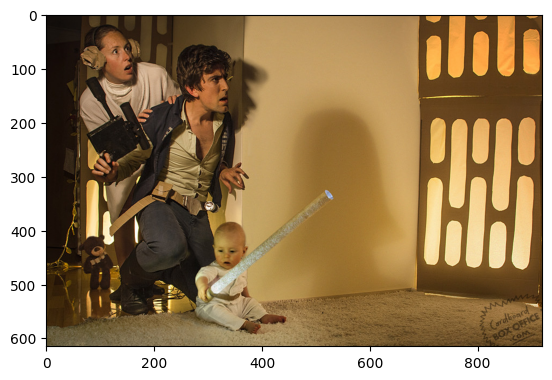

In [ ]:
# Display an Image
plt.imshow(images[101]);

In [ ]:
# Check Image dimensions
print(images[101].shape)

(615, 920, 3)


In [ ]:
# B.	Split the data into Features(X) & labels(Y). Unify shape of all the images.
# Here, X = images, Y = masks 

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
images = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    images[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        # Replace all the pixels within masked area with 1.
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
# Check the shape of Images
images.shape

(409, 224, 224, 3)

In [ ]:
# Check the shape of Masks
masks.shape

(409, 224, 224)

In [ ]:
# Check object type
type(images), type(masks)

(numpy.ndarray, numpy.ndarray)

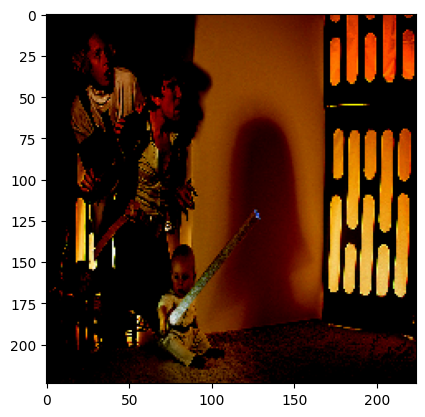

In [ ]:
# Display the Image after resizing
plt.imshow(images[101]);

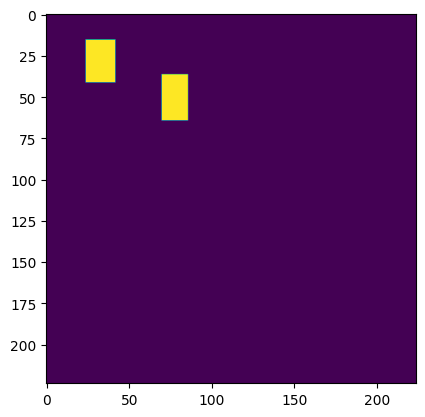

In [ ]:
# Display the image Mask
plt.imshow(masks[101]);

#### Observations:

1) We can see that the mask on the baby's face has been missed even after resizing and pre-processing the images.

In [ ]:
# C.	Split the data into train and test[400:9]. 

# Split the data into train and test sets
# Shuffle the data
#indices = np.random.permutation(len(images))
#images = images[indices]
#masks = masks[indices]

# Split the data into train and test sets
X_train = images[:400]
Y_train = masks[:400]

X_test = images[400:len(images)]
Y_test = masks[400:len(masks)]

# Check the shape of the train and test sets
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (400, 224, 224, 3)
Y_train shape: (400, 224, 224)
X_test shape: (9, 224, 224, 3)
Y_test shape: (9, 224, 224)


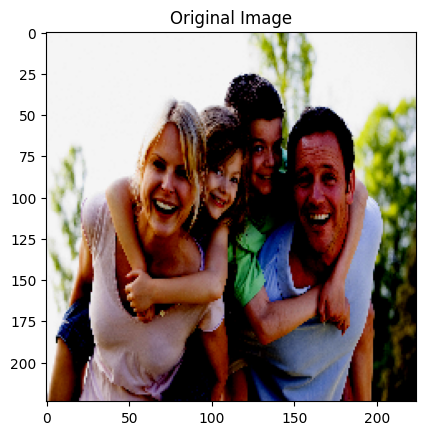

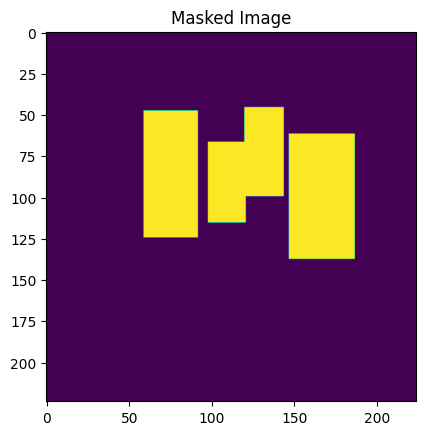

In [ ]:
# D.	Select random image from the train data and display original image and masked image. 
import matplotlib.pyplot as plt

# Select a random image from the train set
index = np.random.randint(len(X_train))

# Display the original image
plt.imshow(X_train[index])
plt.title('Original Image')
plt.show()

# Display the masked image
#plt.imshow(Y_train[index], cmap='gray')
plt.imshow(Y_train[index])
plt.title('Masked Image')
plt.show();

#### Observations:

1) In this case, the image masks have been applied correctly.

## 2.	Model building 

In [ ]:
# A.	Design a face mask detection model. 

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
ALPHA = 1

# Use MobileNet architecture for initial pre-trained non-trainable layers. 
# Define a function to create the MobileNet model with a decoder
def create_model(trainable=False):
    # Load the MobileNet model without the top layer
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    # Set the layers to be trainable or not based on the given flag
    for layer in model.layers:
        layer.trainable = trainable

    # Extract the output of the following layers to use in the decoder
    block00 = model.layers[0].input
    block01 = model.get_layer("conv_pw_1_relu").output
    block02 = model.get_layer("conv_pw_2_relu").output
    block03 = model.get_layer("conv_pw_3_relu").output
    block05 = model.get_layer("conv_pw_5_relu").output
    block11 = model.get_layer("conv_pw_11_relu").output
    block13 = model.get_layer("conv_pw_13_relu").output
    
    # Add appropriate Upsampling layers to imitate U-net architecture.
    # Create the decoder using the extracted feature maps
    decoderBlock = Concatenate()([UpSampling2D()(block13), block11])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block05])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block03])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block01])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block00])

    # Add a final convolutional layer with sigmoid activation for binary segmentation
    decoderBlock = Conv2D(1, kernel_size=1, activation="sigmoid")(decoderBlock)
    decoderBlock = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(decoderBlock)

    # Return the complete model with the decoder
    return Model(inputs=model.input, outputs=decoderBlock)

In [ ]:
# B.	Design your own Dice Coefficient and Loss function. 
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [ ]:
# B.	Design your own Dice Coefficient and Loss function. 
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [ ]:
# C.	Train and tune the model as required. 

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1, min_lr=0.00001)
callbacks = [early_stop, reduce_lr]

# Call the model
model = create_model(False)

# Compile the model
model.compile(optimizer='adam', loss=loss, metrics=[dice_coefficient])
model.summary()

# Train the model
face_mask_detection_model = model.fit(X_train, Y_train, batch_size=4, epochs=20, validation_data=(X_test, Y_test), callbacks=callbacks, verbose = 2)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

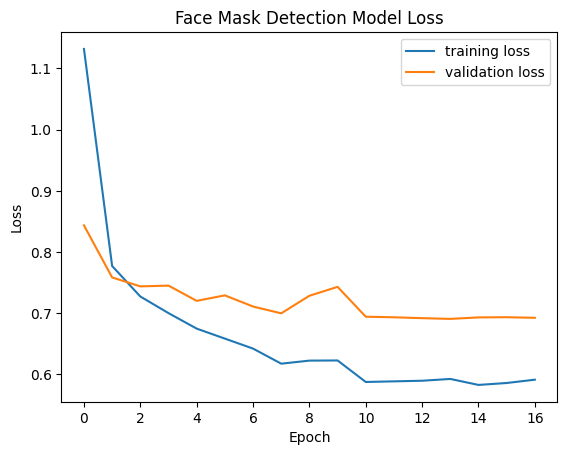

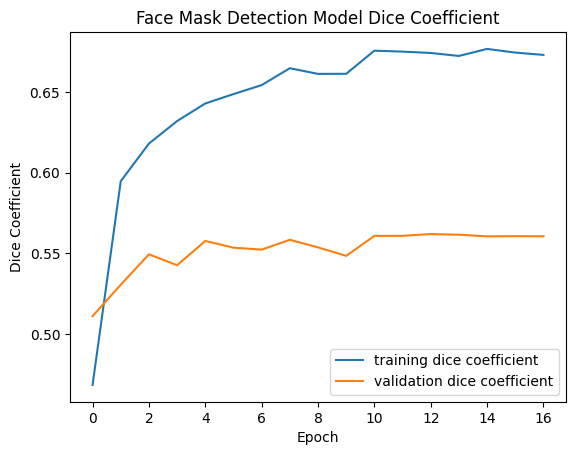

In [ ]:
# Plot loss
plt.plot(face_mask_detection_model.history['loss'], label='training loss')
plt.plot(face_mask_detection_model.history['val_loss'], label='validation loss')
plt.title('Face Mask Detection Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot dice coefficient
plt.plot(face_mask_detection_model.history['dice_coefficient'], label='training dice coefficient')
plt.plot(face_mask_detection_model.history['val_dice_coefficient'], label='validation dice coefficient')
plt.title('Face Mask Detection Model Dice Coefficient')
plt.ylabel('Dice Coefficient')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 3.	Test the model predictions on the test image

1/1 [==============================] - 0s 431ms/step


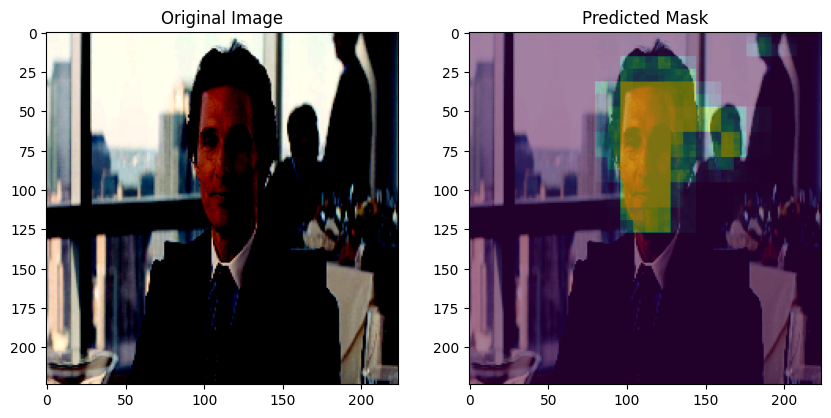

In [ ]:
# Select the test image with index 3
test_image = X_test[3]

# Reshape the test image for prediction
test_image = test_image.reshape(1, *test_image.shape)

# Make the prediction
y_pred = model.predict(test_image)

# Reshape the predicted mask to the original image size
y_pred = y_pred.reshape(*test_image.shape[1:3], 1)

# Plot the original image and the predicted mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(X_test[3])
ax1.set_title('Original Image')

ax2.imshow(X_test[3])
ax2.imshow(y_pred.squeeze(), alpha=0.5)
ax2.set_title('Predicted Mask')

plt.show()

#### Observations:

1) The model performance is on Training data is - loss: 0.5912 - dice_coefficient: 0.6731 

2) The model performance is on Test data is - val_loss: 0.6923 - val_dice_coefficient: 0.5605

3) We can see that the model has picked up on noise as it's masking the background faces as well

#### Notes:

1) To improve the model performance, we can increase the size of the Test dataset to 30% of the total dataset.

In [ ]:
# C.	Train and tune the model as required. 

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1, min_lr=0.00001)
callbacks=[early_stop, reduce_lr]

# Call the model
model = create_model(False)

# Compile the model
model.compile(optimizer='adam', loss=loss, metrics=[dice_coefficient])
model.summary()

# Train the model
face_mask_detection_model_1 = model.fit(images, masks, batch_size=4, epochs=20, validation_split = 0.3, callbacks=callbacks, verbose = 2)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

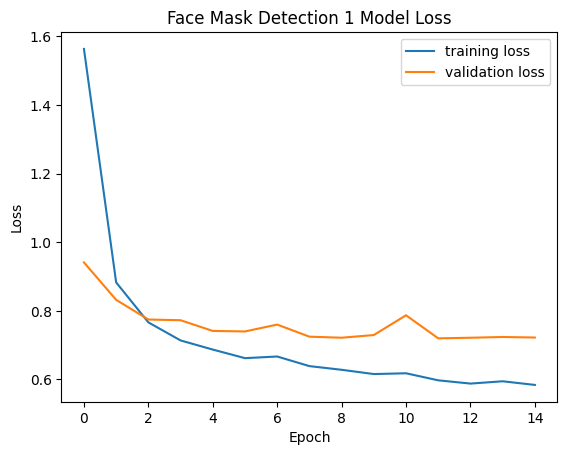

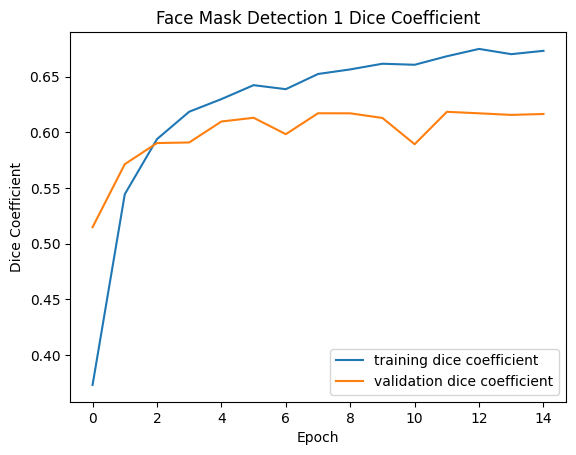

In [ ]:
# Plot loss
plt.plot(face_mask_detection_model_1.history['loss'], label='training loss')
plt.plot(face_mask_detection_model_1.history['val_loss'], label='validation loss')
plt.title('Face Mask Detection 1 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot dice coefficient
plt.plot(face_mask_detection_model_1.history['dice_coefficient'], label='training dice coefficient')
plt.plot(face_mask_detection_model_1.history['val_dice_coefficient'], label='validation dice coefficient')
plt.title('Face Mask Detection 1 Model Dice Coefficient')
plt.ylabel('Dice Coefficient')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


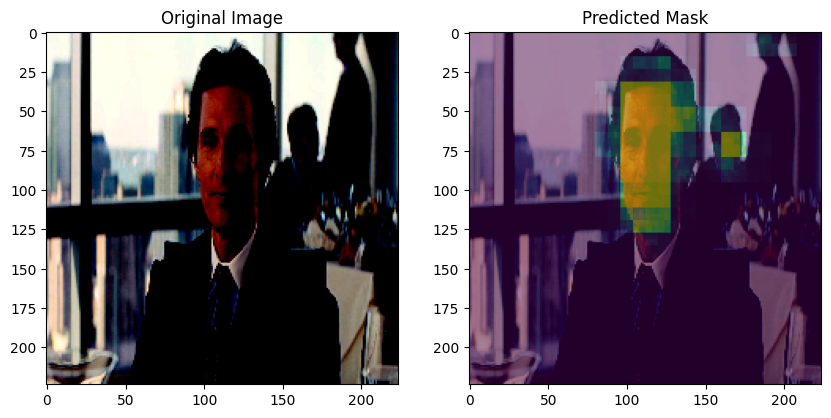

In [ ]:
# Select the test image with index 3
test_image = X_test[3]

# Reshape the test image for prediction
test_image = test_image.reshape(1, *test_image.shape)

# Make the prediction
y_pred = model.predict(test_image)

# Reshape the predicted mask to the original image size
y_pred = y_pred.reshape(*test_image.shape[1:3], 1)

# Plot the original image and the predicted mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(X_test[3])
ax1.set_title('Original Image')

ax2.imshow(X_test[3])
ax2.imshow(y_pred.squeeze(), alpha=0.5)
ax2.set_title('Predicted Mask')

plt.show()

#### Observations:

1) The model performance is on Training data is - loss: 0.5819 - dice_coefficient: 0.6749

2) The model performance is on Test data is - val_loss: 0.7303 - val_dice_coefficient: 0.6134

3) The model performance on Test data has improved, but still we can see that the model is picking up on noise as it's masking the background faces

#### Notes:

1) To further improve the model performance, we can set the model Trainable layers to True along with using 30% of the dataset for Test validation

In [ ]:
# C.	Train and tune the model as required. 

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1, min_lr=0.00001)
callbacks=[early_stop, reduce_lr]

# Call the model
model = create_model(trainable=True)

# Compile the model
model.compile(optimizer='adam', loss=loss, metrics=[dice_coefficient])
model.summary()

# Train the model
face_mask_detection_model_2 = model.fit(images, masks, batch_size=4, epochs=20, validation_split = 0.3, callbacks=callbacks, verbose = 2)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                          

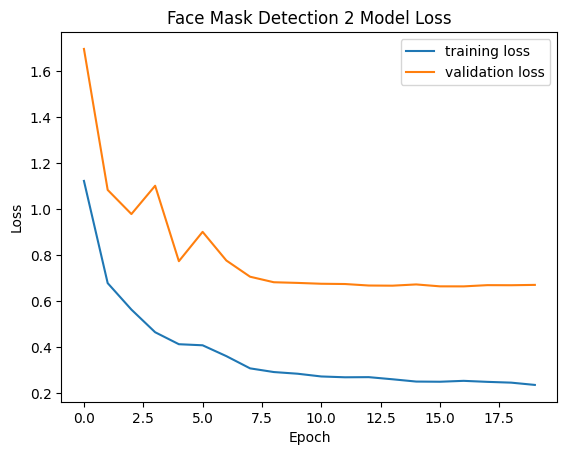

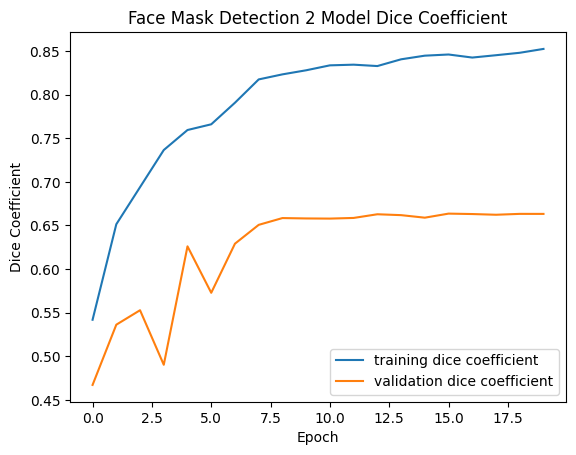

In [ ]:
# Plot loss
plt.plot(face_mask_detection_model_2.history['loss'], label='training loss')
plt.plot(face_mask_detection_model_2.history['val_loss'], label='validation loss')
plt.title('Face Mask Detection 2 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot dice coefficient
plt.plot(face_mask_detection_model_2.history['dice_coefficient'], label='training dice coefficient')
plt.plot(face_mask_detection_model_2.history['val_dice_coefficient'], label='validation dice coefficient')
plt.title('Face Mask Detection 2 Model Dice Coefficient')
plt.ylabel('Dice Coefficient')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 [==============================] - 0s 463ms/step


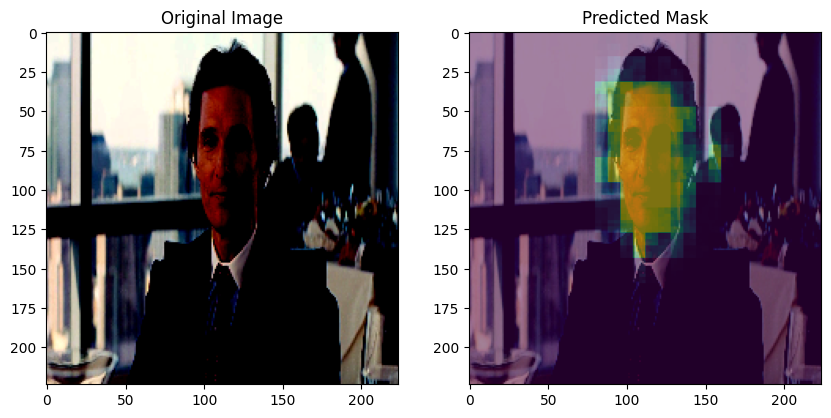

In [ ]:
# Select the test image with index 3
test_image = X_test[3]

# Reshape the test image for prediction
test_image = test_image.reshape(1, *test_image.shape)

# Make the prediction
y_pred = model.predict(test_image)

# Reshape the predicted mask to the original image size
y_pred = y_pred.reshape(*test_image.shape[1:3], 1)

# Plot the original image and the predicted mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(X_test[3])
ax1.set_title('Original Image')

ax2.imshow(X_test[3])
ax2.imshow(y_pred.squeeze(), alpha=0.5)
ax2.set_title('Predicted Mask')

plt.show()

#### Observations:

1) The model performance is on Training data is - loss: 0.2351 - dice_coefficient: 0.8524

2) The model performance is on Test data is - val_loss: 0.6704 - val_dice_coefficient: 0.6633

3) The model performance on Test data has further improved and now we can see that the model is only masking the face in the foreground

## End of Part A

## Part B

•	DOMAIN:  Entertainment
•	CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the
•	DATA DESCRIPTION: The dataset comprises of face images.
•	PROJECT OBJECTIVE: To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.
Steps and tasks: [ Total Score: 10 Marks]
1.	Read/import images from folder ‘training_images’. [2 Marks]
2.	Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]
Hint: You can use ’haarcascade_frontalface_default.xml’ from internet to detect faces which is available open source.
3.	From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]


Sample output DataFrame


4.	Save the output Dataframe in .csv format. [2 Marks]

In [ ]:
# 1.	Read/import images from folder ‘training_images’. 
# Extract the zip file
with zipfile.ZipFile('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/training_images.zip', 'r') as zip_ref:
    zip_ref.extractall('training_images')

In [ ]:
# Check for sub directories in training_images folder
# define the directory path
dir_path = "training_images/"

# get all subdirectories in the directory
subdirs = [f.path for f in os.scandir(dir_path) if f.is_dir()]

# print the list of subdirectories
print(subdirs)

['training_images/training_images']


In [ ]:
import cv2
import os
import pandas as pd

# Initialize the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Set the path to the training images folder
image_path = 'training_images/training_images/'

# Create an empty list to store the metadata for each image
metadata = []

# 2.	Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images
for filename in os.listdir(image_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image
        img = cv2.imread(os.path.join(image_path, filename))
        
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        
        # Get the number of faces detected
        num_faces = len(faces)
        
        # Append the metadata for the image to the list
        for (x, y, w, h) in faces:
            metadata.append([x, y, w, h, num_faces, filename])
    else:
        continue

# 3.	From the same loop above, extract metadata of the faces and write into a DataFrame
metadata_df = pd.DataFrame(metadata, columns=['x', 'y', 'w', 'h', 'Total_Faces', 'Image_Name'])

In [ ]:
type(metadata)

list

In [ ]:
metadata[1]

[47, 86, 467, 467, 1, 'real_00470.jpg']

In [ ]:
# Check dataframe sample
metadata_df.head()

,x,y,w,h,Total_Faces,Image_Name
0,102,179,359,359,1,real_00617.jpg
1,47,86,467,467,1,real_00470.jpg
2,89,168,389,389,1,real_00744.jpg
3,94,164,399,399,1,real_00140.jpg
4,103,177,376,376,2,real_00606.jpg


In [ ]:
# 4.	Save the output Dataframe in .csv format.
metadata_df.to_csv('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/metadata_1.csv', index=True, index_label='Index', start=1)


## End of Part B

## Part C

•	DOMAIN:   Face Recognition
•	CONTEXT: Company X intends to build a face identification model to recognise human faces.
•	DATA DESCRIPTION: The dataset comprises of images and its mask where there is a human face.
•	PROJECT OBJECTIVE: Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library. Some data samples:









Steps and tasks: [ Total Score: 30 Marks]
1.	Unzip, read and Load data(‘PINS.zip’) into session. [2 Marks]
2.	Write function to create metadata of the image. [4 Marks]
Hint: Metadata means derived information from the available data which can be useful for particular problem statement.
3.	Write a loop to iterate through each and every image and create metadata for all the images. [4 Marks]
4.	Generate Embeddings vectors on the each face in the dataset. [4 Marks]
Hint: Use ‘vgg_face_weights.h5’
5.	Build distance metrics for identifying the distance between two similar and dissimilar images. [4 Marks]
6.	Use PCA for dimensionality reduction. [2 Marks]
7.	Build an SVM classifier in order to map each image to its right person. [4 Marks]
8.	Import and display the the test images. [2 Marks]
Hint: ‘Benedict Cumberbatch9.jpg’ and ‘Dwayne Johnson4.jpg’ are the test images.
9.	Use the trained SVM model to predict the face on both test images. [4 Marks]

In [ ]:
# 1.	Unzip, read and Load data(‘PINS.zip’) into session. 
# Extract the zip file
with zipfile.ZipFile('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/PINS.zip', 'r') as zip_ref:
    zip_ref.extractall('PINS')

In [ ]:
# Check for sub directories in training_images folder
# define the directory path
dir_path = "PINS/"

# get all subdirectories in the directory
subdirs = [f.path for f in os.scandir(dir_path) if f.is_dir()]

# print the list of subdirectories
print(subdirs)

['PINS/__MACOSX', 'PINS/PINS']


In [ ]:
# 2.	Write function to create metadata of the image. 
import cv2

def get_metadata(image_path):
    # Read the image and convert to grayscale
    image = cv2.imread(image_path)
    img   = cv2.resize(image, (224, 224))
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Image dimensions
    image_shape = img.shape

    # Detect faces in the image
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Create metadata for each face detected in the image
    metadata = []
    for (x, y, w, h) in faces:
        metadata.append({'image_path': image_path, 'image_shape': image_shape, 'face_coords': (x, y, w, h)})
       # metadata.append([x, y, w, h, image_path])

    return metadata    

#### Notes:

1) Cascade Classifier is used to extract generic features in the entire dataset and is computationally faster.

2) Frontal Face Detector is used to extract unique features from each image in the dataset and performs much better in challenging image background conditions, but is computationally faster.

3) Here, we are using Cascade Classifier due to faster compute time.

In [ ]:
# 3.	Write a loop to iterate through each and every image and create metadata for all the images
%%time

# Set the path of the dataset
train_path = 'PINS/PINS'

# Create an empty list to store metadata of all images
img_metadata_list = []

# Loop through each image in the dataset and create its metadata
for subdir, _, images in os.walk(train_path):
    for image in images:
        # Get the path of the image
        image_path = os.path.join(subdir, image)

        # Create metadata for the image
        img_metadata = get_metadata(image_path)

        # If the metadata is not None, append it to the list
        if img_metadata is not None:
            img_metadata_list.append(img_metadata)

print("Total number of images:", len(img_metadata_list))

Total number of images: 10770
CPU times: user 12min 53s, sys: 12.3 s, total: 13min 5s
Wall time: 9min 49s


In [ ]:
# Check object type
type(img_metadata_list)

list

In [ ]:
# Check random list item
img_metadata_list[100]

[{'image_path': 'PINS/PINS/pins_Chance Perdomo/Chance Perdomo61.jpg',
  'image_shape': (224, 224, 3),
  'face_coords': (34, 16, 160, 160)}]

In [ ]:
# Detect faces in the image using frontal face detector which is more accurate
"""
def create_img_metadata(image_path):
    ""
    Creates metadata for an image.
    :param image_path: path of the image
    :return: metadata dictionary
    ""
    # Get file extension
    file_ext = os.path.splitext(image_path)[1].lower()

    # Check if file is a .jpg or .png image
    if file_ext not in ('.jpg', '.png'):
        return None

    # Read the image
    img = cv2.imread(image_path)

    # Get image dimensions
    height, width, channels = img.shape

    # Initialize the face detector
    detector = dlib.get_frontal_face_detector()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray, 1) # upsample image 1 time before detecting faces

    # Count the number of faces
    num_faces = len(faces)

    # Create metadata dictionary
    metadata = {
        "path": image_path,
        "file_ext": file_ext,
        "height": height,
        "width": width,
        "channels": channels,
        "num_faces": num_faces,
        "face_coordinates": [(face.left(), face.top(), face.right(), face.bottom()) for face in faces]
    }

    return metadata
"""

In [ ]:
# Loop to iterate through each and every image and create metadata for all the images using Multiprocessing
"""
%%time
# Set the path of the dataset
train_path = 'PINS/PINS'

# Get the list of all subdirectories in the train folder
subdirs = os.listdir(train_path)

# Create an empty list to store metadata of all images
img_metadata_list = []

def process_image(image):
    # Get the path of the image
    image_path = os.path.join(train_path, subdir, image)

    # Create metadata for the image
    img_metadata = create_metadata(image_path)

    return img_metadata

# Loop through each subdirectory and read the images
for subdir in subdirs:
    # Get the list of all images in the subdirectory
    images = os.listdir(os.path.join(train_path, subdir))

    # Use multiprocessing to create metadata for each image
    with Pool() as pool:
        img_metadata_list += pool.map(process_image, images)

print("Total number of images:", len(img_metadata_list))
"""

Total number of images: 10770
CPU times: user 2.67 s, sys: 3.79 s, total: 6.46 s
Wall time: 22.4 s


In [ ]:
# Convert the list of dictionaries to a dataframe
img_df = pd.DataFrame([item for sublist in img_metadata_list for item in sublist])
img_df.sample(5)

,image_path,image_shape,face_coords
145,PINS/PINS/pins_Chance Perdomo/Chance Perdomo74...,"(224, 224, 3)","(33, 17, 153, 153)"
5658,PINS/PINS/pins_Aaron Paul/Aaron Paul95_232.jpg,"(224, 224, 3)","(19, 9, 187, 187)"
2058,PINS/PINS/pins_Emilia Clarke/Emilia Clarke141_...,"(224, 224, 3)","(15, 5, 189, 189)"
6907,PINS/PINS/pins_Paul Rudd/Paul Rudd125.jpg,"(224, 224, 3)","(29, 20, 169, 169)"
9386,PINS/PINS/pins_Jim Parsons/Jim Parsons57.jpg,"(224, 224, 3)","(28, 14, 168, 168)"


In [ ]:
# Create a new dataframe and extract the Person name from image path
pinned_img_df = img_df
pinned_img_df['person_name'] = pinned_img_df['image_path'].apply(lambda x: x.split('/')[2])

In [ ]:
pinned_img_df.sample(5)

,image_path,image_shape,face_coords,person_name
9351,PINS/PINS/pins_Jim Parsons/Jim Parsons47.jpg,"(224, 224, 3)","(31, 14, 165, 165)",pins_Jim Parsons
834,PINS/PINS/pins_brie larson/brie larson127.jpg,"(224, 224, 3)","(23, 12, 174, 174)",pins_brie larson
1520,PINS/PINS/pins_Danielle Panabaker/Danielle Pan...,"(224, 224, 3)","(30, 15, 162, 162)",pins_Danielle Panabaker
6465,PINS/PINS/pins_emma watson face/emma watson fa...,"(224, 224, 3)","(37, 17, 161, 161)",pins_emma watson face
6828,PINS/PINS/pins_Paul Rudd/Paul Rudd1.jpg,"(224, 224, 3)","(31, 15, 165, 165)",pins_Paul Rudd


In [ ]:
# Remove unwanted string from Person name field
pinned_img_df['person_name'] = pinned_img_df['person_name'].apply(lambda x: x.replace("pins_", "").replace("face", ""))

In [ ]:
# Check dataframe sample
pinned_img_df.sample(5)

,image_path,image_shape,face_coords,person_name
6255,PINS/PINS/pins_Emily Bett Rickards/Emily Bett ...,"(224, 224, 3)","(29, 11, 176, 176)",Emily Bett Rickards
1389,PINS/PINS/pins_Ryan Reynolds/Ryan Reynolds23.jpg,"(224, 224, 3)","(22, 14, 174, 174)",Ryan Reynolds
3580,PINS/PINS/pins_William Fichtner/William Fichtn...,"(224, 224, 3)","(31, 15, 168, 168)",William Fichtner
8729,PINS/PINS/pins_RJ Mitte/RJ Mitte7_2216.jpg,"(224, 224, 3)","(31, 13, 166, 166)",RJ Mitte
2476,PINS/PINS/pins_elizabeth olsen face/elizabeth ...,"(224, 224, 3)","(26, 11, 181, 181)",elizabeth olsen


In [ ]:
# Convert Person name to upper case to avoid multiple labels getting created for the same person while encoding the target
pinned_img_df['person_name'] = pinned_img_df['person_name'].str.upper()

In [ ]:
# Check dataframe sample
pinned_img_df.sample(5)

,image_path,image_shape,face_coords,person_name
8056,PINS/PINS/pins_Morena Baccarin/Morena Baccarin...,"(224, 224, 3)","(25, 14, 174, 174)",MORENA BACCARIN
5791,PINS/PINS/pins_Gwyneth Paltrow/Gwyneth Paltrow...,"(224, 224, 3)","(29, 16, 162, 162)",GWYNETH PALTROW
7286,PINS/PINS/pins_Jon Bernthal/Jon Bernthal63_215...,"(224, 224, 3)","(22, 13, 176, 176)",JON BERNTHAL
6580,PINS/PINS/pins_drake/drake153_779.jpg,"(224, 224, 3)","(28, 17, 172, 172)",DRAKE
4467,PINS/PINS/pins_Cobie Smulders/Cobie Smulders11...,"(224, 224, 3)","(31, 23, 157, 157)",COBIE SMULDERS


In [ ]:
# Check dataframe description
pinned_img_df.describe()

,image_path,image_shape,face_coords,person_name
count,9672,9672,9672,9672
unique,9628,1,4443,100
top,PINS/PINS/pins_barbara palvin face/barbara pal...,"(224, 224, 3)","(30, 15, 169, 169)",ELIZABETH OLSEN
freq,3,9672,17,174


In [ ]:
# Check for any Nulls in dataframe
pinned_img_df.isna().any().sum()

0

In [ ]:
# Check for any Duplicates in dataframe
pinned_img_df.duplicated().any().sum()

0

In [ ]:
# Create model archtitecture based on VGG-16
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))

    return model

#### Notes:

1) Since, VGG16 can only be initialized with Imagenet as model Weights, we create a new model based on VGG16 architecture to be able to initialize vgg_face_weights as the model Weights.

In [ ]:
# Checking the model input and output layer that will be passed to the VGG Face Descriptor model
VGG_model = vgg_face()
VGG_model.layers[0], VGG_model.layers[-2]

(<keras.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x7fe8589c2b80>,
 <keras.layers.reshaping.flatten.Flatten at 0x7fe8580d48b0>)

In [ ]:
# 4.	Generate Embeddings vectors on the each face in the dataset.
%%time
# Read the .h5 file and assign to a variable.
import h5py
import json

# Open the file as readonly
vgg_face_weights = '/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/vgg_face_weights.h5'

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

# Load the VGG-Face model
model = vgg_face()
model.load_weights(vgg_face_weights)

# Create VGG-Face model for predicting each image face embedding
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

# Generate embeddings for each face in the dataset
embeddings = np.zeros((pinned_img_df.shape[0], 2622))

# Iterate through each row in the dataframe
for i, row in pinned_img_df.iterrows():
    # Read the face image and preprocess it
    (x, y, w, h) = row['face_coords']
    face_image = cv2.imread(row['image_path'])[y:y+h, x:x+w]
    face_image = cv2.resize(face_image, (224, 224))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
    face_image = preprocess_input(face_image)
    
    # Generate the embedding vector for the face
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(face_image, axis=0))[0]
    embeddings[i]  = embedding_vector

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
CPU times: user 18min 53s, sys: 28.9 s, total: 19min 22s
Wall time: 27min 24s


In [ ]:
# Check object type
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [ ]:
# Checing final model input and output
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [ ]:
# Check object type
type(embeddings)

numpy.ndarray

In [ ]:
# Checking embeddings shape
print('embeddings shape :', embeddings.shape)

embeddings shape : (9672, 2622)


In [ ]:
# Check random array item
embeddings[0]

array([-0.74811274, -0.95560527,  0.16876939, ..., -0.48523849,
        2.39366865,  4.52691078])

In [ ]:
# 5.	Build distance metrics for identifying the distance between two similar and dissimilar images.

# Using cosine similarity to compare 2 vectors in high-dimensional spaces
from scipy.spatial.distance import cosine

# Create a function to calculate the cosine distance between two embeddings
def calc_vect_simi(embedding1, embedding2):
    return cosine(embedding1, embedding2)

In [ ]:
# Identifying the distance b/w first two images in the embeddings array
img1_emb = embeddings[0]
img2_emb = embeddings[1]

# Calculate the cosine distance between the embeddings
dist = calc_vect_simi(img1_emb, img2_emb)

print("Cosine distance between images 1 and 2:", dist)

Cosine distance between images 1 and 2: 0.551490586625135


In [ ]:
# Normalize embeddings to scale down each image feature to the same range 
scaler = StandardScaler()
X = scaler.fit_transform(embeddings)

In [ ]:
# 6.	Use PCA for dimensionality reduction. 
from sklearn.decomposition import PCA

# Fit PCA to the embeddings
pca = PCA(n_components=128)
X_PCA  = pca.fit_transform(X)
print(X_PCA.shape)

(9672, 128)


In [ ]:
# Check object type
type(X_PCA)

numpy.ndarray

In [ ]:
# Create Target label for Classification
Y = pinned_img_df['person_name']

In [ ]:
# Check object type
type(Y)

pandas.core.series.Series

In [ ]:
# Checking unique Person names in Target
Y.unique()

array(['SELENA GOMEZ', 'CHANCE PERDOMO', 'ZENDAYA', 'JASON ISAACS',
       'BRENTON THWAITES', 'MAISIE WILLIAMS', 'TOM CAVANAGH',
       'BRIE LARSON', 'DOMINIC PURCELL', 'DUA LIPA ', 'KRISTEN STEWART ',
       'JEFF BEZOS', 'BENEDICT CUMBERBATCH', 'RYAN REYNOLDS',
       'DANIELLE PANABAKER', 'CAMERON MONAGHAN', 'JASON MOMOA',
       'DAVE FRANCO', 'TAYLOR SWIFT', 'JEREMY RENNER', 'EMILIA CLARKE',
       'DAVID MAZOUZ', 'ROBERT KNEPPER', 'JOSH RADNOR',
       'ELIZABETH OLSEN ', 'SEBASTIAN STAN', 'PETER DINKLAGE',
       'GAL GADOT ', 'URSULA CORBERO', 'KRYSTEN RITTER', 'BETSY BRANDT',
       'PEDRO ALONSO', 'AMANDA CREW', 'THOMAS MIDDLEDITCH',
       'ALYCIA DEBNAM CAREY ', 'WILLIAM FICHTNER', 'MARTIN STARR',
       'ANNE HATHAWAY', 'WILLA HOLLAND', 'MIKE COLTER', 'JESSE EISENBERG',
       'TATI GABRIELLE', 'WENTWORTH MILLER', 'KIT HARINGTON',
       'COBIE SMULDERS', 'BRYAN CRANSTON', 'KIERNAN SHIPKA ', 'RIHANNA',
       'LINDSEY MORGAN ', 'MARIA PEDRAZA', 'SCARLETT JOHANSSON',
    

In [ ]:
# Encoding Target label
le = LabelEncoder()
Y_Encd = le.fit_transform(Y)
print(Y_Encd.shape)

(9672,)


In [ ]:
# Check object type
type(Y_Encd)

numpy.ndarray

In [ ]:
# Checking unique labels in Target after Encoding
np.unique(Y_Encd)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, Y_Encd, test_size=0.2, random_state=42)

In [ ]:
# Checking X and Y shapes
print('Shape of X_train for Supervised Models: ', X_train.shape)
print('Shape of Y_train for Neural Networks: ', Y_train.shape)
print('Shape of X_test for Supervised Models: ', X_test.shape)
print('Shape of Y_test for Neural Networks: ', Y_test.shape)

Shape of X_train for Supervised Models:  (7737, 128)
Shape of Y_train for Neural Networks:  (7737,)
Shape of X_test for Supervised Models:  (1935, 128)
Shape of Y_test for Neural Networks:  (1935,)


Model Classification Accuracy:
**************************************************
Accuracy on Training data is 0.9247770453664211
Accuracy on Test data is 0.7695090439276486
**************************************************

Confusion Matrix:

**************************************************


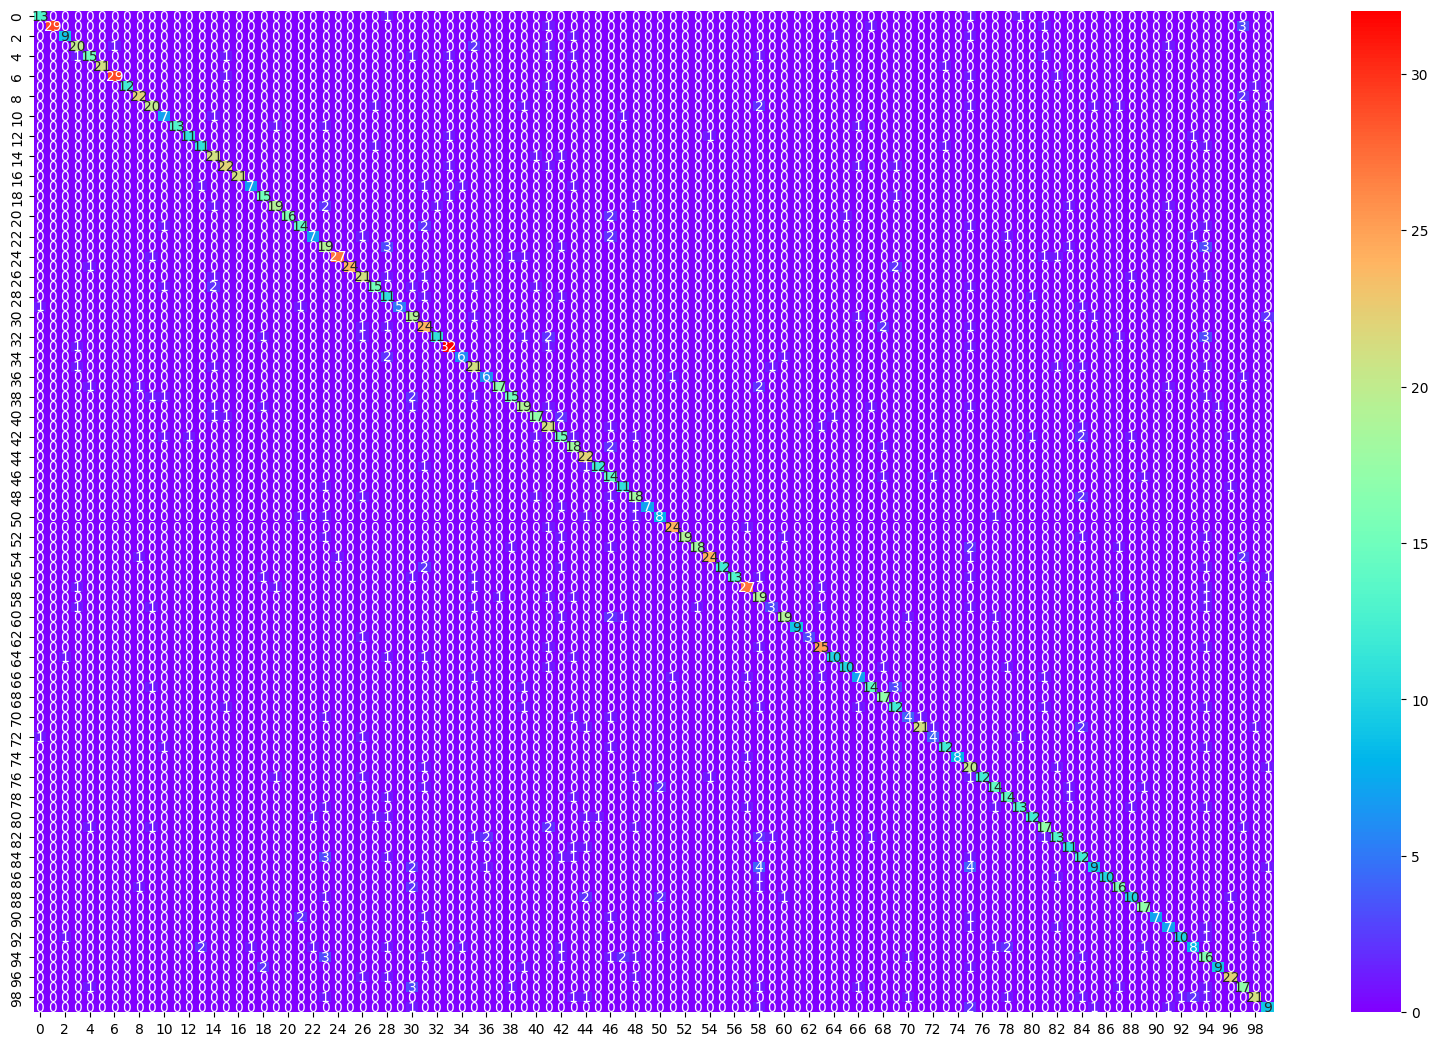

In [ ]:
# 7.	Build an SVM classifier in order to map each image to its right person. 
# Define SVM classifier
svm = SVC(kernel='rbf')

# Train the model on the training data
svm.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = svm.predict(X_test)

# Classification Accuracy
print("Model Classification Accuracy:")
print("*" * 50)
print('Accuracy on Training data is', svm.score(X_train, Y_train))
print('Accuracy on Test data is', svm.score(X_test, Y_test))
print("*" * 50)

print("\nConfusion Matrix:\n")
print("*" * 50)
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (20,13))
sns.heatmap(cm, annot=True, cmap="rainbow")
plt.show()

#### Observations:

1) The accuracy on Training data is 92.47% vs Test data is 76.95%, which indicates good overall model performance.

2) Also, referring to the Confusion Matrix, we can see that the model has mostly made correct predictions for each Label.

In [ ]:
# Save the SVM model to disk
joblib.dump(svm, 'svm_model.joblib')

['svm_model.joblib']

In [ ]:
# Load the SVM model from disk
loaded_svm = joblib.load('svm_model.joblib')

LogR: 0.770265 (0.006011)
KNN: 0.667701 (0.006289)
NB: 0.749276 (0.009382)
SVM-rbf: 0.779570 (0.007496)
D-Tree: 0.286187 (0.010327)
RF: 0.680521 (0.004391)
XGB: 0.679797 (0.007365)


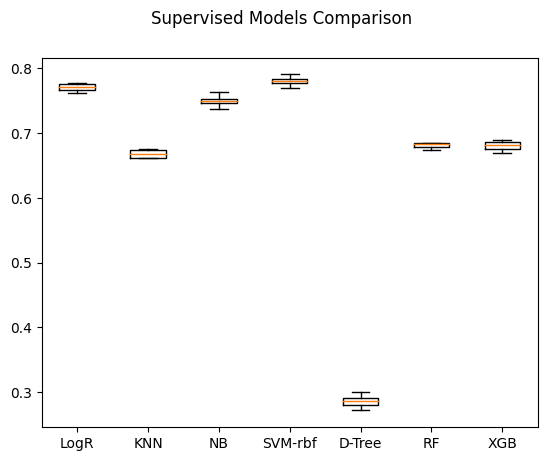

CPU times: user 1h 1min 15s, sys: 25.4 s, total: 1h 1min 40s
Wall time: 36min 24s


In [ ]:
%%time
# K-Fold CV for finding best Supervised Learning model
LogR_model = LogisticRegression()
KNN_model = KNeighborsClassifier(n_neighbors=7)
GN_model = GaussianNB()
svc_model_rbf = SVC(kernel='rbf')
DT_model = DecisionTreeClassifier(criterion='gini')
RF_model = RandomForestClassifier()
XGB_model = XGBClassifier()

seed = 1
# prepare models
models = []
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-rbf', svc_model_rbf))
models.append(('D-Tree', DT_model))
models.append(('RF', RF_model))
models.append(('XGB', XGB_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 4, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_PCA, Y_Encd, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Supervised Models Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observations:

1) The best performing models in K-Fold CV are --> SVM-rbf Classifier(77.95%) > Logistic regression(77.02%) > Naive Bayes(74.92%).



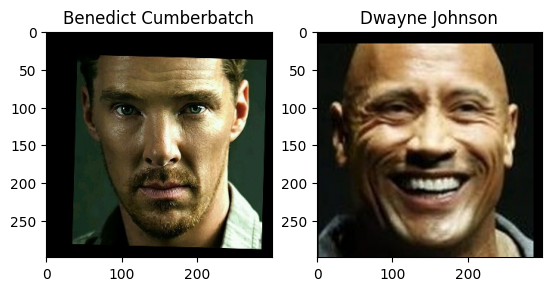

In [ ]:
# 8.	Import and display the the test images. 
from tensorflow.keras.preprocessing import image

# Import test images
img1 = image.load_img('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/Benedict Cumberbatch9.jpg')
img2 = image.load_img('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/Dwayne Johnson4.jpg')

# Display test images
plt.subplot(121)
plt.imshow(img1)
plt.title('Benedict Cumberbatch')
#plt.axis('off')
plt.subplot(122)
plt.imshow(img2)
plt.title('Dwayne Johnson')
plt.show();

In [ ]:
# 9.	Use the trained SVM model to predict the face on both test images. 
# Load the test images
# Import test images
test_img1 = '/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/Benedict Cumberbatch9.jpg'
test_img2 = '/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/Dwayne Johnson4.jpg'
test_images = [test_img1, test_img2]

# Preprocess the test images
test_faces = []
for image_path in test_images:
    image = cv2.imread(image_path)
    img   = cv2.resize(image, (224, 224))
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_faces.append(gray)

# Extract embeddings for test faces
test_embeddings = []
for face in test_faces:
    face = cv2.cvtColor(face, cv2.COLOR_GRAY2RGB)
    face = preprocess_input(face)
    embedding = vgg_face_descriptor.predict(np.expand_dims(face, axis=0))[0]
    test_embeddings.append(embedding)

# Transform embeddings using PCA
test_embeddings_pca = pca.transform(test_embeddings)

# Predict the labels for the test images using the SVM model
test_labels = loaded_svm.predict(test_embeddings_pca)

# Convert the labels to names
test_names = le.inverse_transform(test_labels)

# Print the predicted names for the test images
for i, name in enumerate(test_names):
    print(f"{test_images[i]} is predicted to be {name}")

1/1 [==============================] - 0s 20ms/step
/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/Benedict Cumberbatch9.jpg is predicted to be DAVID MAZOUZ
/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/08_Computer_Vision/02_Face_Recognition/Dwayne Johnson4.jpg is predicted to be DAVID MAZOUZ


#### Observations:

1) The model is incorrectly predicting both test image labels.

2) The model needs to be further assessed and improved to be able to make correct Predictions.

## End of Part C

## End of Project